<h3>Data dictionary</h3>
============================================= Dataset characteristics =====================================================
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [1]:
import warnings
warnings.simplefilter("ignore")
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from statsmodels.api import OLS
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

%matplotlib inline

In [5]:
os.chdir(r'C:\Users\Maniswaroop Meduri\Documents\Class\Linear+Regression+assignment+by+Maniswaroop+M')

In [10]:
# df = pd.read_csv(r'D:\softwares\psnl\Upgrad\Machine learning\Linear Regression Assignment\day.csv')
df = pd.read_csv('day.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [187]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [188]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [189]:
def meta_data(data):
    total = data.isnull().sum()
    percent = total/len(data)*100
    datatype = data.dtypes
    unique = data.nunique()
    
    return pd.concat([total,percent,datatype,unique],axis=1,keys=['Total','percent','datatype','unique']).sort_values(by='percent',ascending=False)

In [190]:
meta_data(df)

,Total,percent,datatype,unique
instant,0,0.0,int64,730
dteday,0,0.0,object,730
season,0,0.0,int64,4
yr,0,0.0,int64,2
mnth,0,0.0,int64,12
holiday,0,0.0,int64,2
weekday,0,0.0,int64,7
workingday,0,0.0,int64,2
weathersit,0,0.0,int64,3
temp,0,0.0,float64,498


In [191]:
#Checking duplicates
duplicate=df.duplicated(subset=None, keep='first')
duplicate=pd.DataFrame(duplicate)
duplicate[duplicate[0]==False].count()
# duplicate

0    730
dtype: int64

**Note**: There are No duplicates

In [192]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

In [193]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [194]:
df['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [195]:
print(df.instant.min())
print(df.instant.max())

1
730


In [196]:
# df.drop(['instant','dteday'], axis =1).corr()#[df.drop(['instant','dteday'], axis =1).corr()['cnt']>0.3]
df[['temp', 'atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


### Removing redundant and unwanted columns
    - We can remove 'atemp' column as 'temp' column also explains the same thing.
    - casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific categoy, we will ignore these two column.
    - Instant and dteday columns,because the are one like index and dteday is timestamp, though we don't required those for regression analysis.


In [11]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Create new Dataframe with copy of existing one.

In [198]:
data_new = df.copy()

**Dropping columns**

In [199]:
data_new.drop(['temp','casual','registered','instant','dteday'],axis=1,inplace=True)

In [200]:
data_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [201]:
data_new.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349


### Assigining values to categoricale variables

#### Assigining values to Weekday

In [202]:
weekday = {0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thursday",5:"friday",6:"saturday"}

In [203]:
data_new['weekday'] = data_new['weekday'].replace(weekday)

In [204]:
data_new.weekday.unique()

array(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday'], dtype=object)

#### Assigining values to Month

In [205]:
month = {1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'}

In [206]:
data_new['mnth']=data_new.mnth.replace(month)

In [207]:
data_new.mnth.unique()

array(['january', 'february', 'march', 'april', 'may', 'june', 'july',
       'august', 'september', 'october', 'november', 'december'],
      dtype=object)

#### Assigining values to seasons

In [208]:
season = {1:'spring',2:'summer',3:'fall',4:'winter'}

In [209]:
data_new['season']=data_new.season.replace(season)

In [210]:
data_new.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

#### Assigining values to weathersit

In [211]:
weathersit = {1:'clear',2:'mist cloudy',3:'light snow',4:'heavy rain'}

In [212]:
data_new['weathersit']=data_new.weathersit.replace(weathersit)

In [213]:
data_new.weathersit.unique()

array(['mist cloudy', 'clear', 'light snow'], dtype=object)

In [214]:
data_new.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,mist cloudy,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,mist cloudy,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,clear,11.46350,43.6957,12.522300,1600


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Understanding Catogorical variables

INSIGHT: There were 6 categorical variables in the dataset. we used Box plot to study their effect on the dependent variable (‘cnt’) . 
    
    - season: More bike booking were happening in season 3 fallowed by season 2 
    
    - mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth columns has some trend for bookings and can be a good predictor for the dependent variable. 
    
    - weathersit: Almost 67% of the bike booking were happening during weathersit 1 with a median of close to 5000 booking . This was followed by weathersit 2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable. 
    
    - holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 
    
    - weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not. 
    
    - workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking . This indicates, workingday can be a good predictor for the dependent variable. 


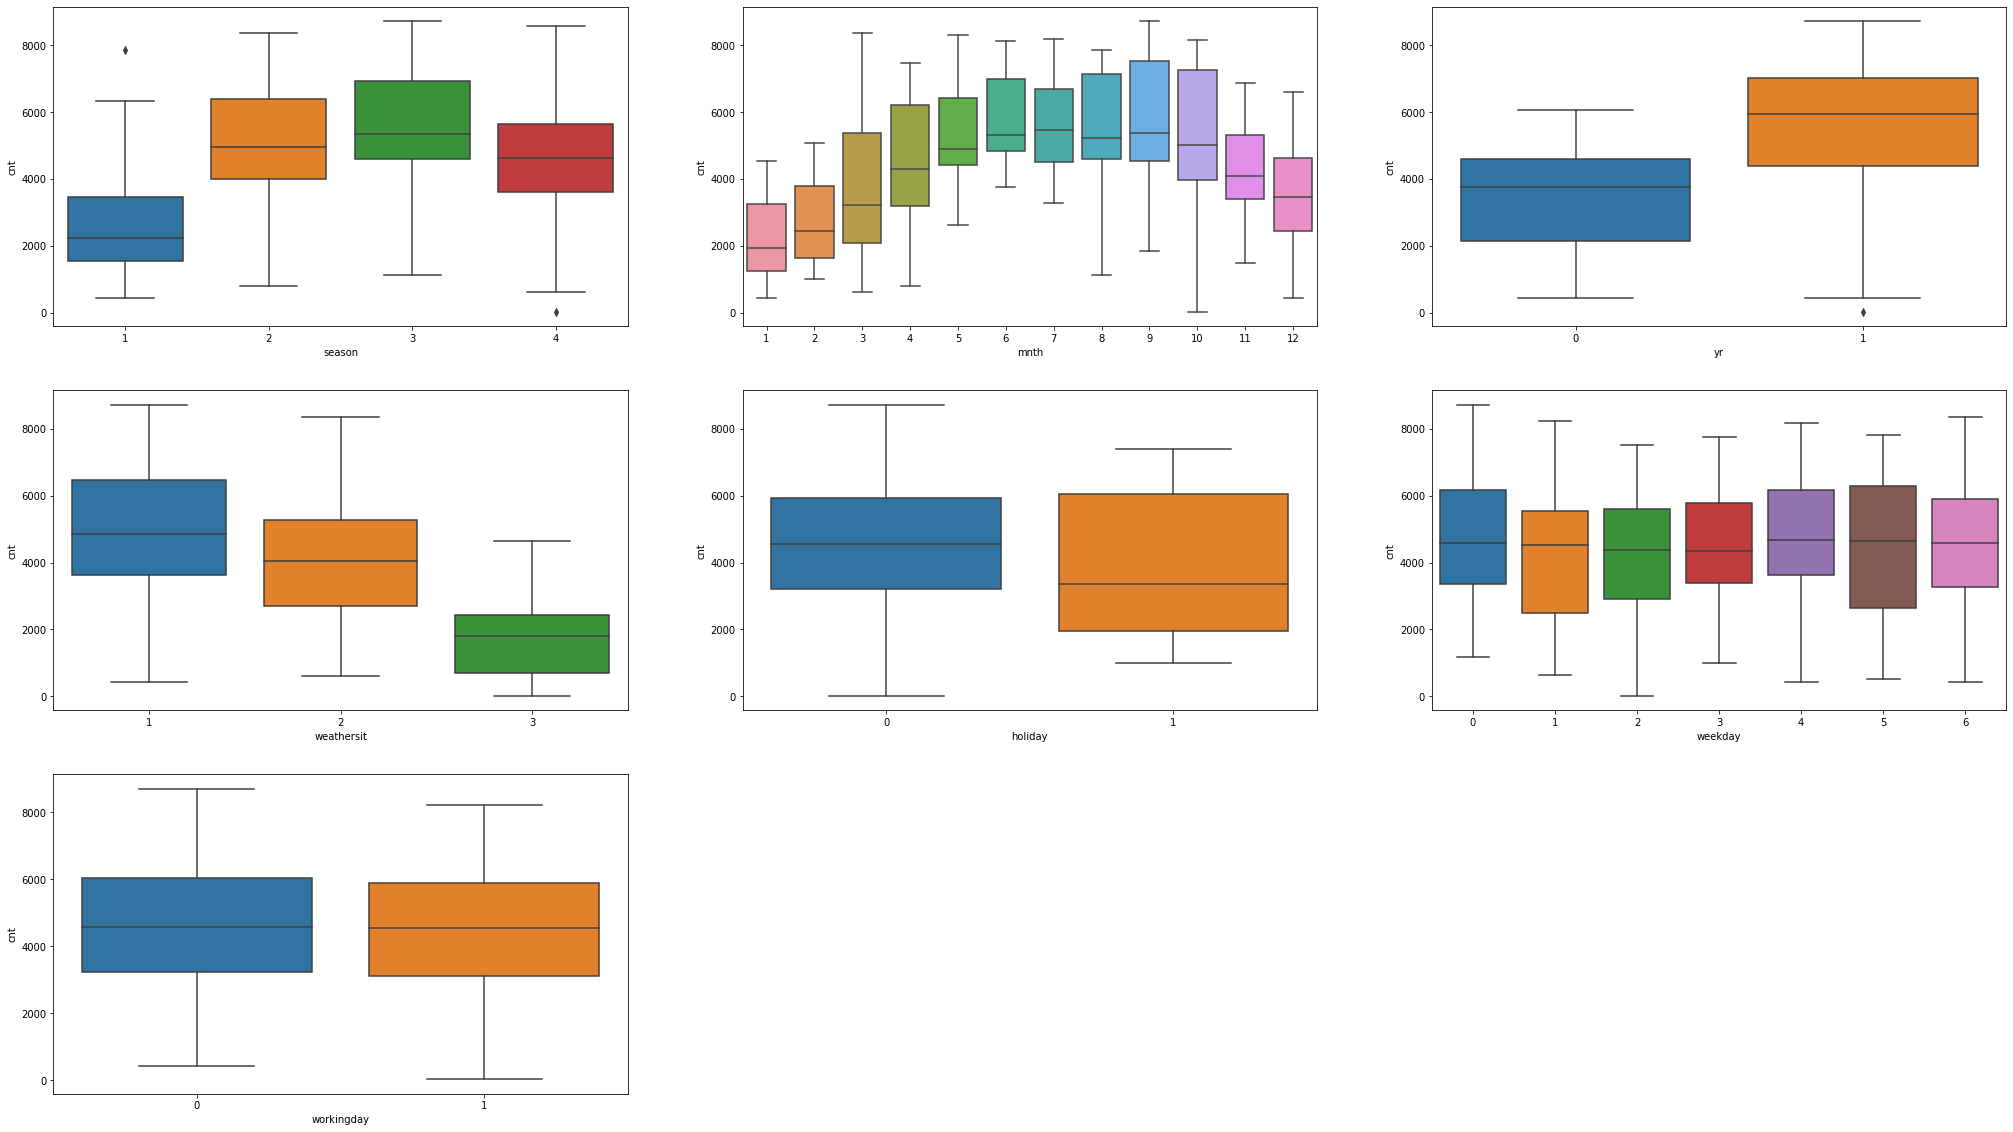

In [216]:
plt.figure(figsize=(35, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

## Understanding Numericle colums
    - cnt and temperature has a decent positive correlation and reamining variables has not much correlation with cnt

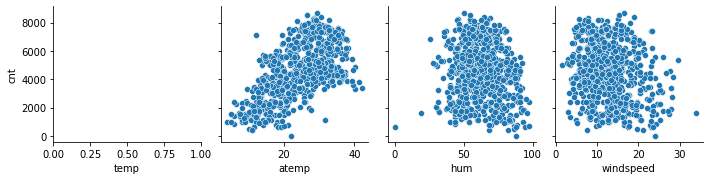

In [217]:
sns.pairplot(df,x_vars=['temp','atemp','hum', 'windspeed'],y_vars=['cnt'])
plt.show()

In [38]:
cor=data_num.corr()
cor

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [231]:
df.corr()['cnt']

instant       0.629896
season        0.404584
yr            0.569728
mnth          0.278191
holiday      -0.068764
weekday       0.036183
workingday   -0.027640
weathersit   -0.295929
temp          0.627044
atemp         0.630685
hum          -0.098543
windspeed    -0.235132
casual        0.672123
registered    0.945411
cnt           1.000000
Name: cnt, dtype: float64

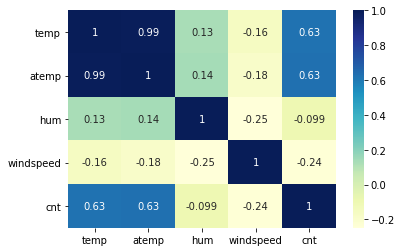

In [40]:
sns.heatmap(cor,annot = True, cmap="YlGnBu");

### Creating Dummy Variables
    - We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. - Before creating dummy variables, we  have to convert them into 'category' data types. ---

In [41]:
# Convert to 'category' data type
data_new['season']=data_new['season'].astype('category')
data_new['weathersit']=data_new['weathersit'].astype('category')
data_new['mnth']=data_new['mnth'].astype('category')
data_new['weekday']=data_new['weekday'].astype('category')
meta_data(data_new)

,Total,percent,datatype,unique
season,0,0.0,category,4
yr,0,0.0,int64,2
mnth,0,0.0,category,12
holiday,0,0.0,int64,2
weekday,0,0.0,category,7
workingday,0,0.0,int64,2
weathersit,0,0.0,category,3
atemp,0,0.0,float64,689
hum,0,0.0,float64,594
windspeed,0,0.0,float64,649


- This code does 3 things:
     - 1) Create Dummy variable
     - 2) Drop original variable for which the dummy was created
     - 3) Drop first dummy variable for each set of dummies created.

In [42]:
data_new = pd.get_dummies(data_new, drop_first=True)

In [43]:
meta_data(data_new)

,Total,percent,datatype,unique
yr,0,0.0,int64,2
mnth_june,0,0.0,uint8,2
weathersit_light snow,0,0.0,uint8,2
weekday_wednesday,0,0.0,uint8,2
weekday_tuesday,0,0.0,uint8,2
weekday_thursday,0,0.0,uint8,2
weekday_sunday,0,0.0,uint8,2
weekday_saturday,0,0.0,uint8,2
weekday_monday,0,0.0,uint8,2
mnth_september,0,0.0,uint8,2


In [44]:
data_new.shape

(730, 29)

In [45]:
data_new.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'weathersit_light snow', 'weathersit_mist cloudy'],
      dtype='object')

## 3) Train and Test split (70:30 ratio)

In [51]:
from sklearn.model_selection import train_test_split
# np.random.seed(0)
df_train, df_test = train_test_split(data_new,train_size = 0.70, test_size = 0.30, random_state = 0)

In [53]:
df_train.shape

(510, 29)

In [54]:
df_test.shape

(219, 29)

### Rescaling the training data
    - Apply min max scalar to all the numeric variables

In [15]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler#StandardScalar

In [56]:
scalar = MinMaxScaler()

In [57]:
num_vars = ['atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scalar.fit_transform(df_train[num_vars])

In [58]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light snow,weathersit_mist cloudy
483,1,0,1,0.487055,0.609956,0.194850,0.722734,0,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,0.409971,0.513852,0.255118,0.815347,0,0,1,...,1,0,0,0,1,0,0,0,0,0
212,0,0,1,0.819376,0.572294,0.276919,0.488265,0,0,0,...,0,0,0,0,0,0,0,1,0,0
714,1,0,1,0.381804,0.871429,0.161523,0.433042,0,0,1,...,0,0,1,0,0,0,0,0,0,1
8,0,0,1,0.048706,0.451083,0.700017,0.092039,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [59]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light snow,weathersit_mist cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,0.241176,...,0.084314,0.082353,0.143137,0.143137,0.143137,0.139216,0.152941,0.131373,0.025490,0.341176
std,0.500487,0.151726,0.462054,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,0.428217,...,0.278131,0.275172,0.350557,0.350557,0.350557,0.346511,0.360284,0.338139,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4) We will use stats api for building OLS (Ordinary Least Square) model

In [60]:
y_train = df_train.cnt
X_train = df_train.drop('cnt',axis=1)

### RFE (To Handle Multicollinearity data)

Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)


In [16]:
from sklearn.feature_selection import RFE

In [63]:
# Running RFE with the output number of the variable equal to 15
lr = LinearRegression()
lr.fit(X_train, y_train)

# running RFE
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_august', False, 12),
 ('mnth_december', True, 1),
 ('mnth_february', True, 1),
 ('mnth_january', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 10),
 ('mnth_march', False, 8),
 ('mnth_may', False, 5),
 ('mnth_november', True, 1),
 ('mnth_october', False, 11),
 ('mnth_september', True, 1),
 ('weekday_monday', False, 7),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', False, 2),
 ('weekday_thursday', False, 14),
 ('weekday_tuesday', False, 6),
 ('weekday_wednesday', False, 9),
 ('weathersit_light snow', True, 1),
 ('weathersit_mist cloudy', True, 1)]

In [65]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_november', 'mnth_september', 'weekday_saturday',
       'weathersit_light snow', 'weathersit_mist cloudy'],
      dtype='object')

In [66]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head(2)

,yr,atemp,hum,windspeed,season_spring,season_winter,mnth_december,mnth_february,mnth_january,mnth_july,mnth_november,mnth_september,weekday_saturday,weathersit_light snow,weathersit_mist cloudy
483,1,0.487055,0.609956,0.194850,0,0,0,0,0,0,0,0,0,0,0
650,1,0.409971,0.513852,0.255118,0,1,0,0,0,0,0,0,0,0,0


In [67]:
# Creating empyty dataframe for VIF(Variance inflation factor) (1/1-r2)
vif = pd.DataFrame()

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif["VIF_factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["features"] = X_train_rfe.columns

In [70]:
vif = vif.sort_values(by = "VIF_factor", ascending = False)
vif

,VIF_factor,features
2,23.889770,hum
1,16.938217,atemp
3,4.925156,windspeed
4,4.512741,season_spring
5,2.709961,season_winter
8,2.416271,mnth_january
14,2.292815,weathersit_mist cloudy
7,2.282153,mnth_february
0,2.051825,yr
10,1.869651,mnth_november


## Model 1

In [76]:
# import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [77]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     168.2
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          5.45e-183
Time:                        22:10:10   Log-Likelihood:                 500.59
No. Observations:                 510   AIC:                            -969.2
Df Residuals:                     494   BIC:                            -901.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3900      0.034     11.632      0.000       0.324       0.456
yr                         0.2305      0.008     27.748      0.000       0.214       0.247
atemp                      0.4315      0.035     12.161      0.000       0.362       0.501
hum                       -0.1663      0.038     -4.351      0.000      -0.241      -0.091
windspeed                 -0.1715      0.028     -6.132      0.000      -0.226      -0.117
season_spring             -0.0930      0.019     -5.009      0.000      -0.130      -0.057
season_winter              0.0718      0.014      5.082      0.000       0.044       0.100
mnth_december             -0.0717      0.019     -3.775      0.000      -0.109      -0.034
mnth_february             -0.0500      0.022     -2.317      0.021      -0.092      -0.008
mnth_january              -0.0678      0.022     -3.066      0.002      -0.111      -0.024
mnth_july                 -0.0441      0.017     -2.539      0.011      -0.078      -0.010
mnth_november             -0.0732      0.019     -3.802      0.000      -0.111      -0.035
mnth_september             0.0626      0.016      3.996      0.000       0.032       0.093
weekday_saturday           0.0244      0.012      2.078      0.038       0.001       0.047
weathersit_light snow     -0.2678      0.029     -9.256      0.000      -0.325      -0.211
weathersit_mist cloudy    -0.0494      0.011     -4.540      0.000      -0.071      -0.028
==============================================================================
Omnibus:                       83.564   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.465
Skew:                          -0.817   Prob(JB):                     3.64e-48
Kurtosis:                       5.759   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model2 
    
NOTE: - Removing the variable 'workingday' based on its High p-value


In [80]:
X_train_new = X_train_rfe.copy()

In [81]:
# Creating empyty dataframe for VIF
vif2 = pd.DataFrame()
vif2["VIF_factor"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif2["features"] = X_train_new.columns
vif2 = vif2.sort_values(by = "VIF_factor", ascending = False)
vif2

,VIF_factor,features
2,23.889770,hum
1,16.938217,atemp
3,4.925156,windspeed
4,4.512741,season_spring
5,2.709961,season_winter
8,2.416271,mnth_january
14,2.292815,weathersit_mist cloudy
7,2.282153,mnth_february
0,2.051825,yr
10,1.869651,mnth_november


In [85]:
X_train_new1 = X_train_rfe.drop(["hum"], axis = 1) #Multicollinearity check (VIF, RFE, OLS Summery)

In [87]:
# Creating empyty dataframe for VIF
vif3 = pd.DataFrame()
vif3["VIF_factor"] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif3["features"] = X_train_new1.columns
vif3 = vif3.sort_values(by = "VIF_factor", ascending = False)
vif3

,VIF_factor,features
1,5.182493,atemp
2,4.891341,windspeed
3,4.198162,season_spring
4,2.429320,season_winter
7,2.302919,mnth_january
6,2.238514,mnth_february
0,2.044533,yr
9,1.825884,mnth_november
13,1.534108,weathersit_mist cloudy
5,1.518333,mnth_december


In [88]:
# Add a constant
X_train_lm13 = sm.add_constant(X_train_new1)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm13).fit()

In [90]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     172.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.20e-180
Time:                        08:51:58   Log-Likelihood:                 491.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     495   BIC:                            -888.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0


  __atemp__: A coefficient value of ‘0.39’ indicated that a unit increase in temperature feature, increases the bike  hire  by 0.39 units.
    
  __yr__: A coefficient value of ‘0.23’ indicated that a unit increase in temperature feature, increases the bike  hire  by 0.23 units.

  __windspeed__: A coefficient value of ‘-0.14’ indicated that a unit increase in temperature feature, decreases the bike  hire  by 0.14 units.
  
  __season_spring__: A coefficient value of ‘-0.09’ indicated that a unit increase in temperature feature, decreases the bike  hire  by 0.09 units.
  
  __season_winter__: A coefficient value of ‘0.07’ indicated that a unit increase in temperature feature, increases the bike  hire  by 0.07 units. 
  
  __mnth_december__: A coefficient value of ‘-0.08’ indicated that a unit increase in temperature feature, decreases the bike  hire  by 0.08 units.
  
  __mnth_january__: A coefficient value of ‘-0.07’ indicated that a unit increase in temperature feature, decreases the bike  hire  by 0.07 units.
   
  __mnth_february__: A coefficient value of ‘-0.05’ indicated that a unit increase in temperature feature, decreases the bike  hire  by 0.05 units.
   
  __mnth_july__: A coefficient value of ‘-0.04’ indicated that a unit increase in temperature feature, decreases the bike  hire  by 0.04 units.
  
  __mnth_november__: A coefficient value of ‘-0.07’ indicated that a unit increase in temperature feature, decreases the bike  hire  by 0.07 units.
  
  __mnth_september__: A coefficient value of ‘0.06’ indicated that a unit increase in temperature feature, increases the bike  hire  by 0.06 units.

__weekday_saturday__: A coefficient value of ‘0.03’ indicated that a unit increase in temperature feature, increases the bike  hire  by 0.03 units.

__weathersit_light snow__: A coefficient value of ‘-0.31’ indicated that a unit increase in temperature feature, decreases the bike  hire  by 0.31 units.

__weathersit_mist cloudy__: A coefficient value of ‘-0.08’ indicated that a unit increase in temperature feature, decreases the bike  hire  by 0.08 units.

   

# Model Evaluation

### MinMax Scalar for Test data

In [162]:
df_test_ = df_test.copy()
df_test_[X_train_new1.columns] = scalar.fit_transform(df_test_[X_train_new1.columns])

In [165]:
df_test_ = pd.concat([df_test_[X_train_new1.columns],df_test['cnt']], axis = 1)

In [167]:
# splitting x and y variables
x_test_=df_test_.drop('cnt',axis=1)
y_test = df_test_.cnt

In [173]:
# Adding constant and predicting on x test data
x_test_con_ = sm.add_constant(x_test_)
y_pred_=lr3.predict(x_test_con_)

### Plotting y_test and y_pred to understand the spread

Both predicted values and test values has a very good correlation 

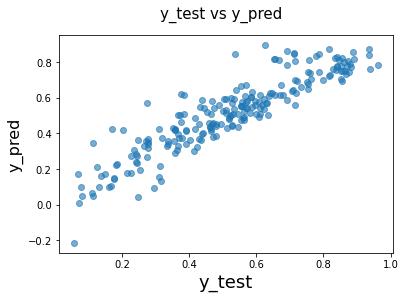

In [181]:
fig = plt.figure()
plt.scatter(y_test, y_pred_, alpha=.6);
fig.suptitle('y_test vs y_pred', fontsize = 15);              # Plot heading 
plt.xlabel('y_test', fontsize = 18);                         # X-label
plt.ylabel('y_pred', fontsize = 16);     

In [183]:
results = pd.concat([y_pred_,y_test],axis=1)
results.columns = ['y_pred','y_test']
results.corr()

,y_pred,y_test
y_pred,1.000000,0.908022
y_test,0.908022,1.000000


### One of the major post model assumption for error which fallows the almost Normal distribution 

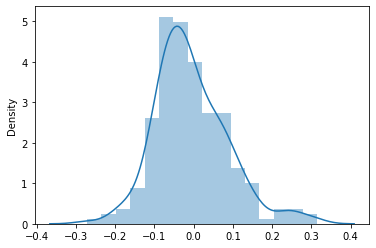

In [179]:
error = y_pred_-y_test
sns.distplot(error);

#### R square

In [176]:
from sklearn.metrics import r2_score,mean_squared_error
r2_=r2_score(y_test, y_pred_)
round(r2_,2)

0.82

#### Calculating the adjested R square
R2adj.=1−(1−R2)∗n−1n−p−1

In [177]:
# n is number of rows in X
rows = x_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
cols = x_test.shape[1]
# We find the Adjusted R-squared using the formula

adjusted_r2_ = 1-(1-r2_)*(rows-1)/(rows-cols-1)
round(adjusted_r2_,2)

0.81

### FINAL RESULT COMPARISON:
   __Train R^2__ :0.83  ___Train Adjusted R^2___ :0.82 
   
   ___Test R^2___ :0.82  __Test Adjusted R^2__ :0.81 
   
   This seems to be a really good model that can very well 'Generalize' various datasets.


In [135]:
lr3.params

const                     0.299668
yr                        0.234854
atemp                     0.396456
windspeed                -0.138366
season_spring            -0.090980
season_winter             0.066408
mnth_december            -0.083974
mnth_february            -0.054717
mnth_january             -0.074379
mnth_july                -0.036532
mnth_november            -0.074576
mnth_september            0.057039
weekday_saturday          0.027204
weathersit_light snow    -0.317633
weathersit_mist cloudy   -0.077013
dtype: float64